---

# Analyse non supervisée de "habitat_composition_by_station.csv"

In [ ]:
# Importation des bibliothèques
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [ ]:
!pip install mplleaflet
!pip install osmnx
!pip install cartopy
!pip install pyquickhelper
!pip install dbfread
!pip install papierstat
!pip install pyensae
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.7 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=ec734a5e0e735becc6919151c6351ea2a227cc1e20c43c6a9187a8e74a723786
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
from papierstat.datasets import load_enedis_dataset
df = pd.read_csv("habitat_composition_by_station.csv")
#df = load_enedis_dataset()
df.head(n=2).T

0         1
LID                                     1         2
Site                                    A         A
Code                                   A1        A2
Commune                           Mijanes   Mijanes
LD                               Estagnet  Estagnet
Transect                              375       375
Dynamique                           rouge     rouge
Position                           estive   lisiere
Annee                                2022      2022
SMMini                               5765      7108
LAT                               42.6886   42.6899
LON                                1.9722    1.9765
total_edge_length_100                   0       150
edge_density_100                      0.0   47.3186
Shannon_landscape_diversity_100       0.0    0.0938
grass_and_shub_cover_100            100.0   98.1073
deciduous_forest_cover_100            0.0       0.0
coniferous_forest_cover_100           0.0    1.8927
mineral_cover_100                     0.0       0.0
ice_and_snow_cover_100                  0         0
water_cover_100                       0.0       0.0
total_edge_length_250                   0      2600
edge_density_250                      0.0  132.5854
Shannon_landscape_diversity_250       0.0    0.4431
grass_and_shub_cover_250            100.0   88.5263
deciduous_forest_cover_250            0.0       0.0
coniferous_forest_cover_250           0.0    7.5472
mineral_cover_250                     0.0     0.408
ice_and_snow_cover_250                  0         0
water_cover_250                       0.0    3.5186
total_edge_length_500                4740     11970
edge_density_500                  60.4207  152.5813
Shannon_landscape_diversity_500    0.1972    0.5587
grass_and_shub_cover_500          95.9592   84.0408
deciduous_forest_cover_500            0.0       0.0
coniferous_forest_cover_500         1.963   11.3576
mineral_cover_500                  2.0778    3.6201
ice_and_snow_cover_500                0.0       0.0
water_cover_500                       0.0    0.9815

In [ ]:
df.columns

Index(['LID', 'Site', 'Code', 'Commune', 'LD', 'Transect', 'Dynamique',
       'Position', 'Annee', 'SMMini', 'LAT', 'LON', 'total_edge_length_100',
       'edge_density_100', 'Shannon_landscape_diversity_100',
       'grass_and_shub_cover_100', 'deciduous_forest_cover_100',
       'coniferous_forest_cover_100', 'mineral_cover_100',
       'ice_and_snow_cover_100', 'water_cover_100', 'total_edge_length_250',
       'edge_density_250', 'Shannon_landscape_diversity_250',
       'grass_and_shub_cover_250', 'deciduous_forest_cover_250',
       'coniferous_forest_cover_250', 'mineral_cover_250',
       'ice_and_snow_cover_250', 'water_cover_250', 'total_edge_length_500',
       'edge_density_500', 'Shannon_landscape_diversity_500',
       'grass_and_shub_cover_500', 'deciduous_forest_cover_500',
       'coniferous_forest_cover_500', 'mineral_cover_500',
       'ice_and_snow_cover_500', 'water_cover_500'],
      dtype='object')

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from cartopy.io.img_tiles import OSM

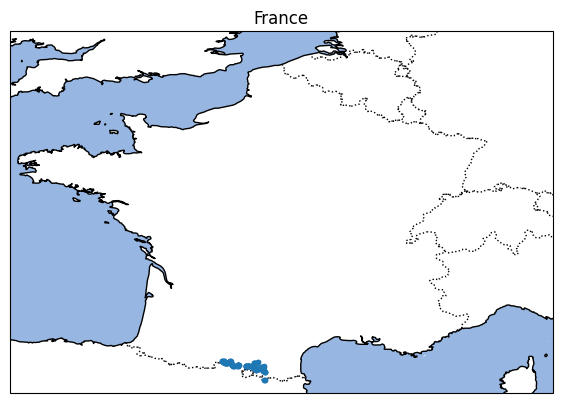

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-5, 10, 42, 52])

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.plot(df.LON, df.LAT, '.')
ax.set_title('France');

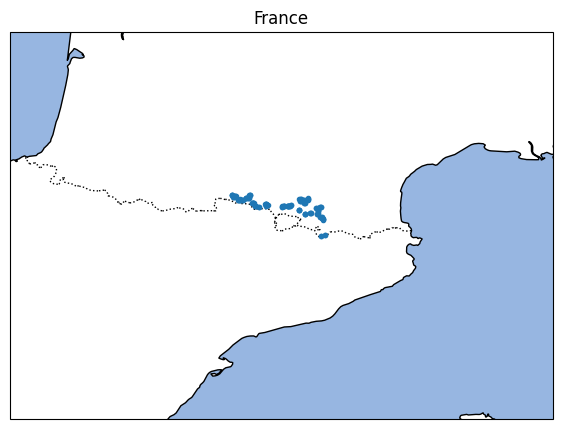

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-2, 5, 40, 45])

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.plot(df.LON, df.LAT, '.')
ax.set_title('France');

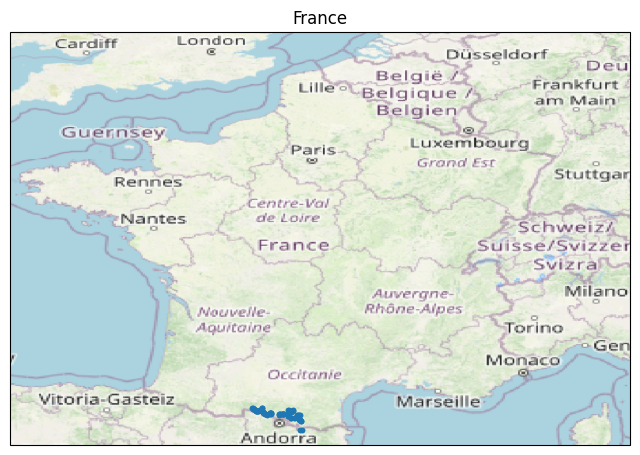

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-5, 10, 42, 52])

imagery = OSM()
ax.add_image(imagery, 5)
# plus c'est grand, plus c'est précis, plus ça prend du temps

ax.plot(df.LON, df.LAT, '.')
ax.set_title('France');

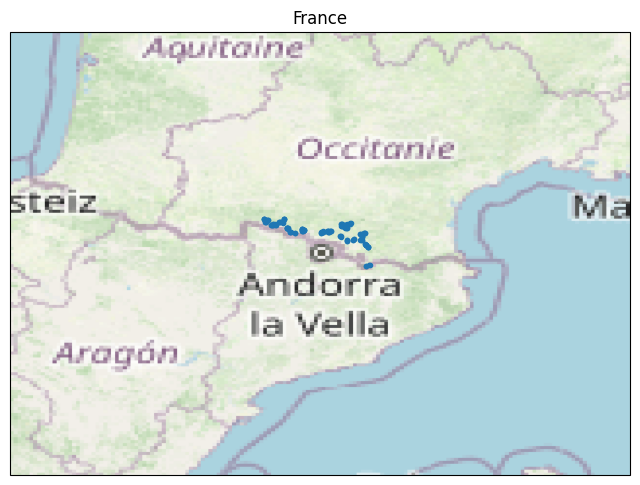

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-2, 5, 40, 45])

imagery = OSM()
ax.add_image(imagery, 5)
# plus c'est grand, plus c'est précis, plus ça prend du temps

ax.plot(df.LON, df.LAT, '.')
ax.set_title('France');

In [ ]:
# Sélection des colonnes pertinentes pour l'analyse de la composition d'habitats
features = df.iloc[:, 3:]
features

Commune                       LD  Transect Dynamique Position  Annee  \
0        Mijanes                 Estagnet       375     rouge   estive   2022   
1        Mijanes                 Estagnet       375     rouge  lisiere   2022   
2        Mijanes                 Estagnet       374      bleu   estive   2022   
3        Mijanes                 Estagnet       374      bleu  lisiere   2022   
4        Mijanes                Trabesses       373     rouge   estive   2022   
..           ...                      ...       ...       ...      ...    ...   
143  Formiguères        Serra dels Alarbs        44      bleu  lisiere   2023   
144   Saint-Lary  Col de l'Herbe Soulette       386     rouge   estive   2023   
145   Saint-Lary  Col de l'Herbe Soulette       386     rouge  lisiere   2023   
146   Saint-Lary  Col de l'Herbe Soulette       228      bleu   estive   2023   
147   Saint-Lary  Col de l'Herbe Soulette       228      bleu  lisiere   2023   

     SMMini      LAT     LON  total_edge_length_100  ...  water_cover_250  \
0      5765  42.6886  1.9722                      0  ...           0.0000   
1      7108  42.6899  1.9765                    150  ...           3.5186   
2      7142  42.6957  1.9750                    350  ...           0.0000   
3      7175  42.6936  1.9756                    250  ...           0.0000   
4      5810  42.7347  2.0095                      0  ...           0.0000   
..      ...      ...     ...                    ...  ...              ...   
143    6992  42.6040  2.0047                    690  ...           0.0000   
144    6936  42.8861  0.8684                      0  ...           0.0000   
145    4559  42.8874  0.8699                    460  ...           0.0000   
146    7175  42.8860  0.8650                      0  ...           0.0000   
147    5765  42.8869  0.8636                    320  ...           0.0000   

     total_edge_length_500  edge_density_500  Shannon_landscape_diversity_500  \
0                     4740           60.4207                           0.1972   
1                    11970          152.5813                           0.5587   
2                    10190          129.8917                           0.5047   
3                    10630          135.5003                           0.5124   
4                     5570           71.0006                           0.5508   
..                     ...               ...                              ...   
143                   8680          110.6437                           0.6339   
144                   4440           56.5966                           0.7249   
145                   5450           69.4710                           0.8039   
146                   2150           27.4060                           0.6730   
147                   2180           27.7884                           0.6962   

     grass_and_shub_cover_500  deciduous_forest_cover_500  \
0                     95.9592                      0.0000   
1                     84.0408                      0.0000   
2                     84.3212                      0.0000   
3                     83.3525                      0.0000   
4                     83.6201                      5.5449   
..                        ...                         ...   
143                   82.3582                      6.9726   
144                   64.0408                      1.8101   
145                   44.6144                      2.9955   
146                   60.9305                      0.0510   
147                   42.2945                      0.2294   

     coniferous_forest_cover_500  mineral_cover_500  ice_and_snow_cover_500  \
0                         1.9630             2.0778                     0.0   
1                        11.3576             3.6201                     0.0   
2                        13.6520             0.3952                     0.0   
3                        15.0797             0.5609                     0.0   
4         

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

In [ ]:
# Sélection des colonnes pertinentes pour l'encodage des étiquettes
categorical_columns = ['LD', 'Position', 'Dynamique', 'Commune', 'Site', 'Code']  # Colonnes catégorielles à encoder

# Copie des données pour ne pas modifier les données originales
encoded_data = df.copy()

label_encoders, encoded_values = {}, {}

for c in categorical_columns:
    label_encoders[c] = LabelEncoder()
    df[c] = label_encoders[c].fit_transform(df[c])
    encoded_values[c] = dict(zip(label_encoders[c].classes_, label_encoders[c].transform(label_encoders[c].classes_)))


# Afficher le dictionnaire des valeurs encodées
print("Dictionnaire des valeurs encodées :")
print(encoded_values)

# Afficher le DataFrame après les modifications
print("\nDataFrame final :")
df

Dictionnaire des valeurs encodées :
{'LD': {'Ayet': 0, 'Cirque de Gerac': 1, "Col d'Escots": 2, 'Col de Grail': 3, 'Col de Nédé': 4, 'Col de Pause': 5, "Col de l'Arech": 6, "Col de l'Herbe Soulette": 7, 'Col du Sasc': 8, 'Comte': 9, 'Coume': 10, 'Estagnet': 11, "Etang d'Appy": 12, 'Eychelle': 13, 'Eylie': 14, 'Frau': 15, 'Guzet-Neige': 16, 'Isard': 17, 'Le Clot': 18, "Mont d'Olmes": 19, 'Orle': 20, 'Pailheres': 21, 'Pic de Montbuou': 22, 'Pic du Midi de Bordes': 23, 'Pla de Montcamp': 24, 'Pla des Salines': 25, 'Plateau de Beille': 26, 'Pouill': 27, 'Puig del Pam': 28, 'RNCFS': 29, "Roc d'Aude": 30, 'Saubé': 31, 'Serra dels Alarbs': 32, 'Soularac': 33, 'Trabesses': 34, 'Trimouns': 35, 'Turon de Rose': 36, 'Val de Sos': 37}, 'Position': {'estive': 0, 'lisiere': 1}, 'Dynamique': {'bleu': 0, 'rouge': 1}, 'Commune': {'Antras': 0, 'Appy': 1, 'Arrien-en-Bethmale': 2, 'Ascou': 3, 'Aston': 4, 'Aulus-les-Bains': 5, 'Bestiac': 6, 'Bethmale': 7, 'Bonac': 8, 'Bonac-Irazein': 9, 'Couflens': 10, 'Fo

LID  Site  Code  Commune  LD  Transect  Dynamique  Position  Annee  \
0      1     0     0       18  11       375          1         0   2022   
1      2     0     1       18  11       375          1         1   2022   
2      3     0     2       18  11       374          0         0   2022   
3      4     0     3       18  11       374          0         1   2022   
4      5    12    48       18  34       373          1         0   2022   
..   ...   ...   ...      ...  ..       ...        ...       ...    ...   
143  144    10    43       11  32        44          0         1   2023   
144  145    11    44       24   7       386          1         0   2023   
145  146    11    45       24   7       386          1         1   2023   
146  147    11    46       24   7       228          0         0   2023   
147  148    11    47       24   7       228          0         1   2023   

     SMMini  ...  water_cover_250  total_edge_length_500  edge_density_500  \
0      5765  ...           0.0000                   4740           60.4207   
1      7108  ...           3.5186                  11970          152.5813   
2      7142  ...           0.0000                  10190          129.8917   
3      7175  ...           0.0000                  10630          135.5003   
4      5810  ...           0.0000                   5570           71.0006   
..      ...  ...              ...                    ...               ...   
143    6992  ...           0.0000                   8680          110.6437   
144    6936  ...           0.0000                   4440           56.5966   
145    4559  ...           0.0000                   5450           69.4710   
146    7175  ...           0.0000                   2150           27.4060   
147    5765  ...           0.0000                   2180           27.7884   

     Shannon_landscape_diversity_500  grass_and_shub_cover_500  \
0                             0.1972                   95.9592   
1                             0.5587                   84.0408   
2                             0.5047                   84.3212   
3                             0.5124                   83.3525   
4                             0.5508                   83.6201   
..                               ...                       ...   
143                           0.6339                   82.3582   
144                           0.7249                   64.0408   
145                           0.8039                   44.6144   
146                           0.6730                   60.9305   
147                           0.6962                   42.2945   

     deciduous_forest_cover_500  coniferous_forest_cover_500  \
0                        0.0000                       1.9630   
1                        0.0000                      11.3576   
2                        0.0000                      13.6520   
3                        0.0000                      15.0797   
4                        5.5449                      10.8349   
..                          ...                          ...   
143                      6.9726                       8.7954   
144                      1.8101                      34.1491   
145                      2.9955                      52.3901   
146                      0.0510                      39.0185   
147                      0.2294                      57.4761   

     mineral_cover_500  ice_and_snow_cover_500  water_cover_500  
0               2.0778                     0.0           0.0000  
1               3.6201                     0.0           0.9815  
2               0.3952                     0.0           1.6316  
3               0.5609                     0.0           1.0070  
4               0.0000                     0.0           0.0000  
..                 ...                     ...              ...  
143             1.8738                     0.0           0.0000  
144             0.0000                     0.0           0.0000  
145        

## ACP Study

In [ ]:
# ACP
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

## t-SNE Study

In [ ]:
# t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
tsne_result = tsne.fit_transform(df)

## uMap Study

In [ ]:
# uMap
umap = UMAP(n_components=2)
umap_result = umap.fit_transform(df)

## Plotting

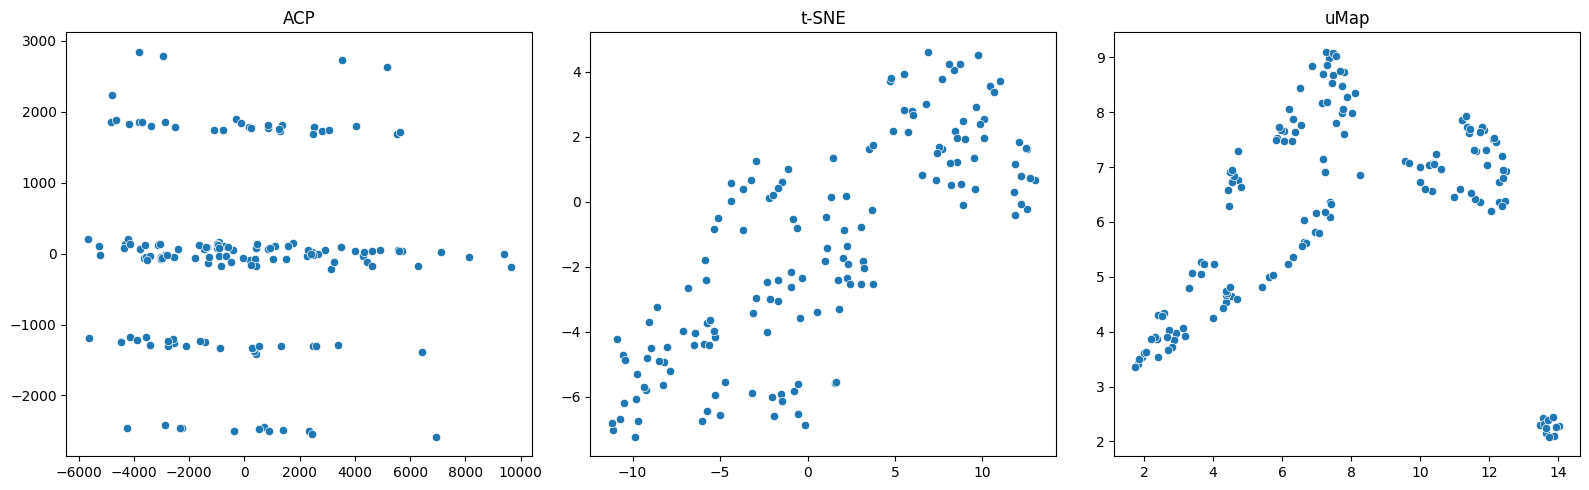

In [ ]:
# Plotting
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])
plt.title('ACP')

plt.subplot(1, 3, 2)
sns.scatterplot(x=tsne_result[:,0], y=tsne_result[:,1])
plt.title('t-SNE')

plt.subplot(1, 3, 3)
sns.scatterplot(x=umap_result[:,0], y=umap_result[:,1])
plt.title('uMap')

plt.tight_layout()
plt.show()

# Test sur Dynamique

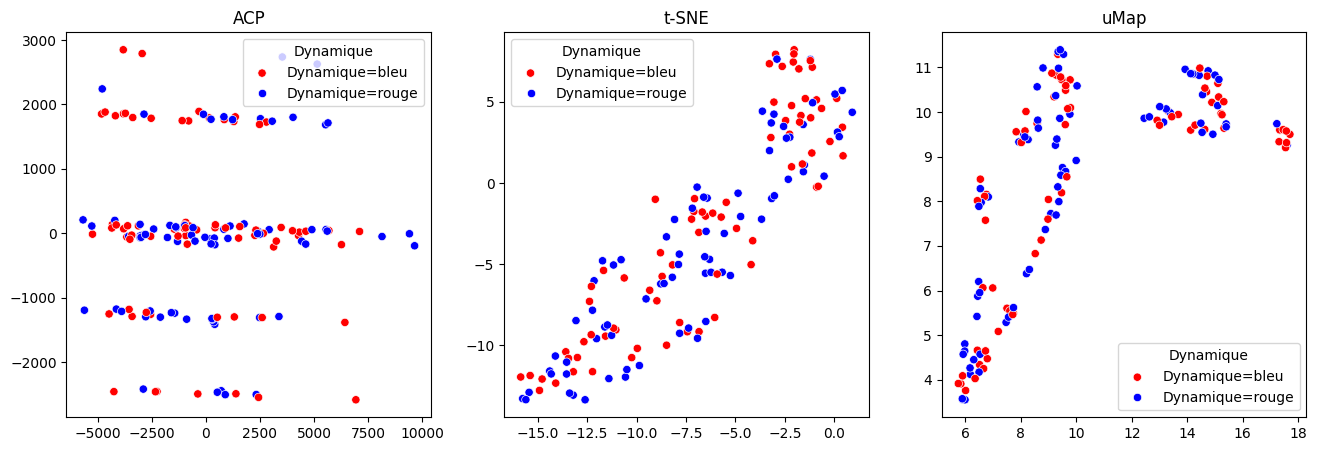

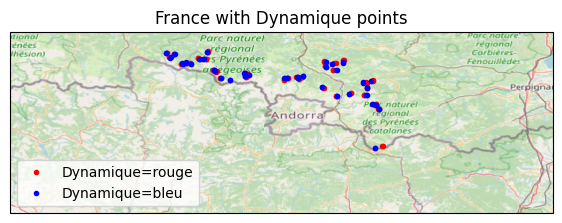

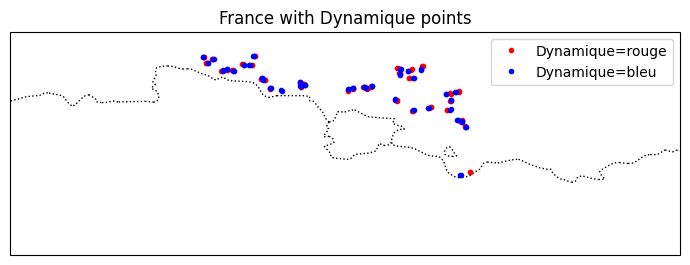

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que vous avez une colonne 'Dynamique' dans votre DataFrame 'df'

# Créer une liste de couleurs en fonction de la valeur de 'Dynamique'
color_palette = {0: 'blue', 1: 'red'}

# ACP
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=df['Dynamique'], palette=color_palette)
plt.title('ACP')
plt.legend(title='Dynamique', labels=['Dynamique=bleu', 'Dynamique=rouge'])

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
tsne_result = tsne.fit_transform(df)

plt.subplot(1, 3, 2)
sns.scatterplot(x=tsne_result[:,0], y=tsne_result[:,1], hue=df['Dynamique'], palette=color_palette)
plt.title('t-SNE')
plt.legend(title='Dynamique', labels=['Dynamique=bleu', 'Dynamique=rouge'])

# uMap
umap = UMAP(n_components=2)
umap_result = umap.fit_transform(df)

plt.subplot(1, 3, 3)
sns.scatterplot(x=umap_result[:,0], y=umap_result[:,1], hue=df['Dynamique'], palette=color_palette)
plt.title('uMap')
plt.legend(title='Dynamique', labels=['Dynamique=bleu', 'Dynamique=rouge'])

# Plotting the map of France with Dynamique points
lon_min, lon_max, lat_min, lat_max = 0, 3, 42, 43

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max])

imagery = OSM()
ax.add_image(imagery, 8)

# Filter points where Dynamique=1
df_dynamique_1 = df[df['Dynamique'] == 1]
ax.plot(df_dynamique_1['LON'], df_dynamique_1['LAT'], '.', color='red', label='Dynamique=rouge', transform=ccrs.PlateCarree())

# Filter points where Dynamique=0
df_dynamique_0 = df[df['Dynamique'] == 0]
ax.plot(df_dynamique_0['LON'], df_dynamique_0['LAT'], '.', color='blue', label='Dynamique=bleu', transform=ccrs.PlateCarree())

ax.set_title('France with Dynamique points')
ax.legend()



fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max])

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Filter points where Dynamique=1
df_dynamique_1 = df[df['Dynamique'] == 1]
ax.plot(df_dynamique_1['LON'], df_dynamique_1['LAT'], '.', color='red', label='Dynamique=rouge', transform=ccrs.PlateCarree())

# Filter points where Dynamique=0
df_dynamique_0 = df[df['Dynamique'] == 0]
ax.plot(df_dynamique_0['LON'], df_dynamique_0['LAT'], '.', color='blue', label='Dynamique=bleu', transform=ccrs.PlateCarree())

ax.set_title('France with Dynamique points')
ax.legend()


plt.tight_layout()
plt.show()


In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que vous avez une colonne 'Position' dans votre DataFrame 'df'

# Créer une liste de couleurs en fonction de la valeur de 'Position'
color_palette = {0: 'blue', 1: 'red'}

# ACP
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=df['Position'], palette=color_palette)
plt.title('ACP')
plt.legend(title='Position', labels=['Position=bleu', 'Position=rouge'])

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
tsne_result = tsne.fit_transform(df)

plt.subplot(1, 3, 2)
sns.scatterplot(x=tsne_result[:,0], y=tsne_result[:,1], hue=df['Position'], palette=color_palette)
plt.title('t-SNE')
plt.legend(title='Position', labels=['Position=bleu', 'Position=rouge'])

# uMap
umap = UMAP(n_components=2)
umap_result = umap.fit_transform(df)

plt.subplot(1, 3, 3)
sns.scatterplot(x=umap_result[:,0], y=umap_result[:,1], hue=df['Position'], palette=color_palette)
plt.title('uMap')
plt.legend(title='Position', labels=['Position=bleu', 'Position=rouge'])

# Plotting the map of France with Position points
lon_min, lon_max, lat_min, lat_max = 0, 3, 42, 43

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max])

imagery = OSM()
ax.add_image(imagery, 8)

# Filter points where Position=1
df_position_1 = df[df['Position'] == 1]
ax.plot(df_position_1['LON'], df_position_1['LAT'], '.', color='red', label='Position=rouge', transform=ccrs.PlateCarree())

# Filter points where Position=0
df_position_0 = df[df['Position'] == 0]
ax.plot(df_position_0['LON'], df_position_0['LAT'], '.', color='blue', label='Position=bleu', transform=ccrs.PlateCarree())

ax.set_title('France with Position points')
ax.legend()



fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max])

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Filter points where position=1
df_position_1 = df[df['Position'] == 1]
ax.plot(df_position_1['LON'], df_position_1['LAT'], '.', color='red', label='Position=rouge', transform=ccrs.PlateCarree())

# Filter points where position=0
df_position_0 = df[df['Position'] == 0]
ax.plot(df_position_0['LON'], df_position_0['LAT'], '.', color='blue', label='Position=bleu', transform=ccrs.PlateCarree())

ax.set_title('France with position points')
ax.legend()


plt.tight_layout()
plt.show()



---

# K-MEANS

## Mapping du k-means sur l'ACP

In [ ]:
from sklearn.cluster import KMeans

# Effectuer le clustering K-means sur les données ACP
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(pca_result)

# Encodage de chaque point avec l'identifiant de son cluster
df['Cluster_ACP'] = cluster_labels

# Affichage des cinq premières lignes pour vérification
print(df.T)

                                       0           1           2    \
LID                                 1.0000      2.0000      3.0000   
Site                                0.0000      0.0000      0.0000   
Code                                0.0000      1.0000      2.0000   
Commune                            18.0000     18.0000     18.0000   
LD                                 11.0000     11.0000     11.0000   
Transect                          375.0000    375.0000    374.0000   
Dynamique                           1.0000      1.0000      0.0000   
Position                            0.0000      1.0000      0.0000   
Annee                            2022.0000   2022.0000   2022.0000   
SMMini                           5765.0000   7108.0000   7142.0000   
LAT                                42.6886     42.6899     42.6957   
LON                                 1.9722      1.9765      1.9750   
total_edge_length_100               0.0000    150.0000    350.0000   
edge_density_100    

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


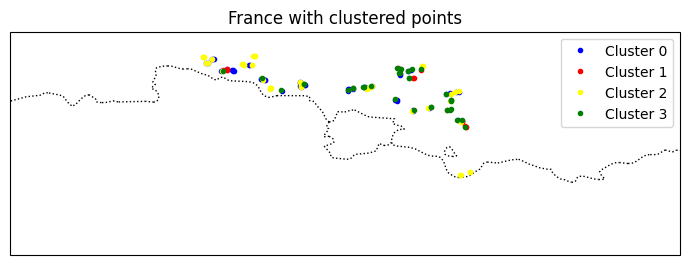

In [ ]:
# Définir les couleurs pour chaque cluster
cluster_colors = {0: 'blue', 1: 'red', 2: 'orange', 3: 'green'}

# Tracer la carte de la France
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max])

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Tracer les points en fonction de leur cluster
for cluster_label, color in cluster_colors.items():
    df_cluster = df[df['Cluster_ACP'] == cluster_label]
    ax.plot(df_cluster['LON'], df_cluster['LAT'], '.', color=color, label=f'Cluster {cluster_label}', transform=ccrs.PlateCarree())

ax.set_title('France with clustered points')
ax.legend()

plt.tight_layout()
plt.show()


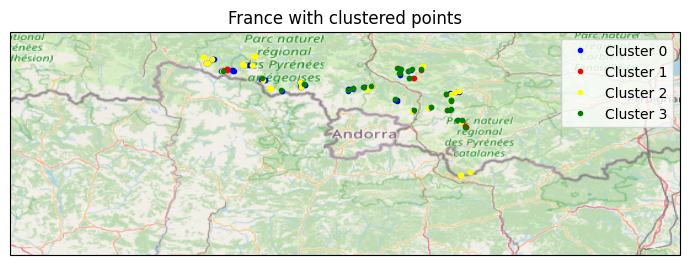

In [ ]:
# Définir les couleurs pour chaque cluster
cluster_colors = {0: 'blue', 1: 'red', 2: 'orange', 3: 'green'}

# Tracer la carte de la France
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max])

imagery = OSM()
ax.add_image(imagery, 8)
# Tracer les points en fonction de leur cluster
for cluster_label, color in cluster_colors.items():
    df_cluster = df[df['Cluster_ACP'] == cluster_label]
    ax.plot(df_cluster['LON'], df_cluster['LAT'], '.', color=color, label=f'Cluster {cluster_label}', transform=ccrs.PlateCarree())

ax.set_title('France with clustered points')
ax.legend()

plt.tight_layout()
plt.show()


## Mapping du k-means sur le t-SNE

In [ ]:
# Effectuer le clustering K-means sur les données t-SNE
kmeans_tsne = KMeans(n_clusters=4, random_state=42)
cluster_labels_tsne = kmeans_tsne.fit_predict(tsne_result)

# Encodage de chaque point avec l'identifiant de son cluster
df['Cluster_tSNE'] = cluster_labels_tsne

# Affichage des cinq premières lignes pour vérification
print(df.head())


   LID  Site  Code  Commune  LD  Transect  Dynamique  Position  Annee  SMMini  \
0    1     0     0       18  11       375          1         0   2022    5765   
1    2     0     1       18  11       375          1         1   2022    7108   
2    3     0     2       18  11       374          0         0   2022    7142   
3    4     0     3       18  11       374          0         1   2022    7175   
4    5    12    48       18  34       373          1         0   2022    5810   

   ...  Shannon_landscape_diversity_500  grass_and_shub_cover_500  \
0  ...                           0.1972                   95.9592   
1  ...                           0.5587                   84.0408   
2  ...                           0.5047                   84.3212   
3  ...                           0.5124                   83.3525   
4  ...                           0.5508                   83.6201   

   deciduous_forest_cover_500  coniferous_forest_cover_500  mineral_cover_500  \
0                

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


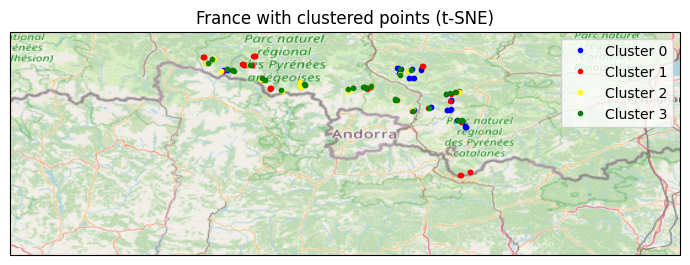

In [ ]:
# Définir les couleurs pour chaque cluster
cluster_colors_tsne = {0: 'blue', 1: 'red', 2: 'orange', 3: 'green'}

# Tracer la carte de la France
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max])

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Tracer les points en fonction de leur cluster t-SNE
for cluster_label, color in cluster_colors_tsne.items():
    df_cluster_tsne = df[df['Cluster_tSNE'] == cluster_label]
    ax.plot(df_cluster_tsne['LON'], df_cluster_tsne['LAT'], '.', color=color, label=f'Cluster {cluster_label}', transform=ccrs.PlateCarree())

ax.set_title('France with clustered points (t-SNE)')
ax.legend()

plt.tight_layout()
plt.show()

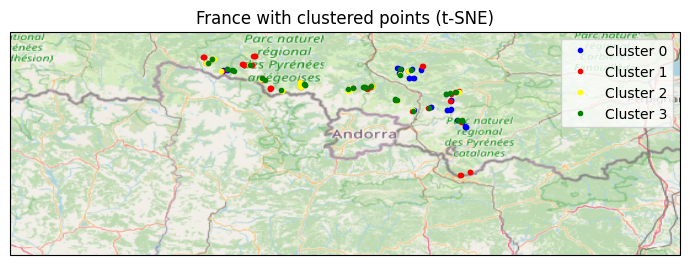

In [ ]:
# Définir les couleurs pour chaque cluster
cluster_colors_tsne = {0: 'blue', 1: 'red', 2: 'orange', 3: 'green'}

# Tracer la carte de la France
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max])

imagery = OSM()
ax.add_image(imagery, 8)

# Tracer les points en fonction de leur cluster t-SNE
for cluster_label, color in cluster_colors_tsne.items():
    df_cluster_tsne = df[df['Cluster_tSNE'] == cluster_label]
    ax.plot(df_cluster_tsne['LON'], df_cluster_tsne['LAT'], '.', color=color, label=f'Cluster {cluster_label}', transform=ccrs.PlateCarree())

ax.set_title('France with clustered points (t-SNE)')
ax.legend()

plt.tight_layout()
plt.show()

## Mapping du k-means sur l'UMAP

In [ ]:
# Effectuer le clustering K-means sur les données UMAP
kmeans_umap = KMeans(n_clusters=4, random_state=42)
cluster_labels_umap = kmeans_umap.fit_predict(umap_result)

# Encodage de chaque point avec l'identifiant de son cluster
df['Cluster_uMAP'] = cluster_labels_umap

# Affichage des cinq premières lignes pour vérification
print(df.head())


   LID  Site  Code  Commune  LD  Transect  Dynamique  Position  Annee  SMMini  \
0    1     0     0       18  11       375          1         0   2022    5765   
1    2     0     1       18  11       375          1         1   2022    7108   
2    3     0     2       18  11       374          0         0   2022    7142   
3    4     0     3       18  11       374          0         1   2022    7175   
4    5    12    48       18  34       373          1         0   2022    5810   

   ...  Shannon_landscape_diversity_500  grass_and_shub_cover_500  \
0  ...                           0.1972                   95.9592   
1  ...                           0.5587                   84.0408   
2  ...                           0.5047                   84.3212   
3  ...                           0.5124                   83.3525   
4  ...                           0.5508                   83.6201   

   deciduous_forest_cover_500  coniferous_forest_cover_500  mineral_cover_500  \
0                

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


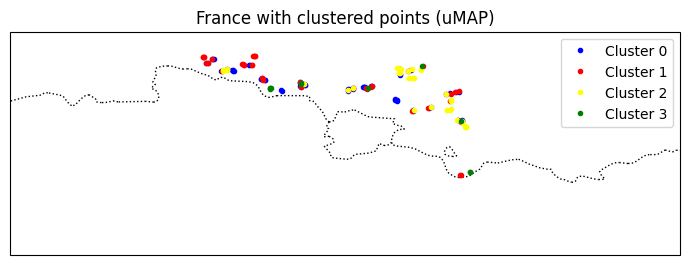

In [ ]:
# Définir les couleurs pour chaque cluster
cluster_colors_umap = {0: 'blue', 1: 'red', 2: 'orange', 3: 'green'}

# Tracer la carte de la France
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max])

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Tracer les points en fonction de leur cluster UMAP
for cluster_label, color in cluster_colors_umap.items():
    df_cluster_umap = df[df['Cluster_uMAP'] == cluster_label]
    ax.plot(df_cluster_umap['LON'], df_cluster_umap['LAT'], '.', color=color, label=f'Cluster {cluster_label}', transform=ccrs.PlateCarree())

ax.set_title('France with clustered points (uMAP)')
ax.legend()

plt.tight_layout()
plt.show()


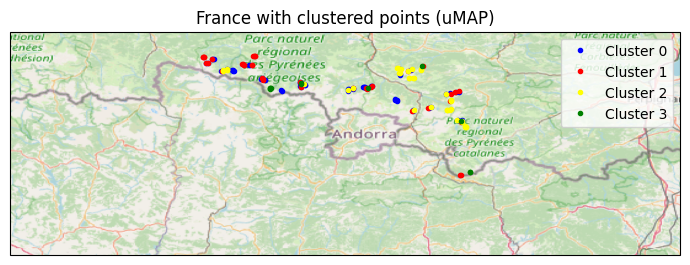

In [ ]:

# Définir les couleurs pour chaque cluster
cluster_colors_umap = {0: 'blue', 1: 'red', 2: 'orange', 3: 'green'}

# Tracer la carte de la France
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max])

imagery = OSM()
ax.add_image(imagery, 8)

# Tracer les points en fonction de leur cluster UMAP
for cluster_label, color in cluster_colors_umap.items():
    df_cluster_umap = df[df['Cluster_uMAP'] == cluster_label]
    ax.plot(df_cluster_umap['LON'], df_cluster_umap['LAT'], '.', color=color, label=f'Cluster {cluster_label}', transform=ccrs.PlateCarree())

ax.set_title('France with clustered points (uMAP)')
ax.legend()

plt.tight_layout()
plt.show()


## Comparaison des 3 clustering methods

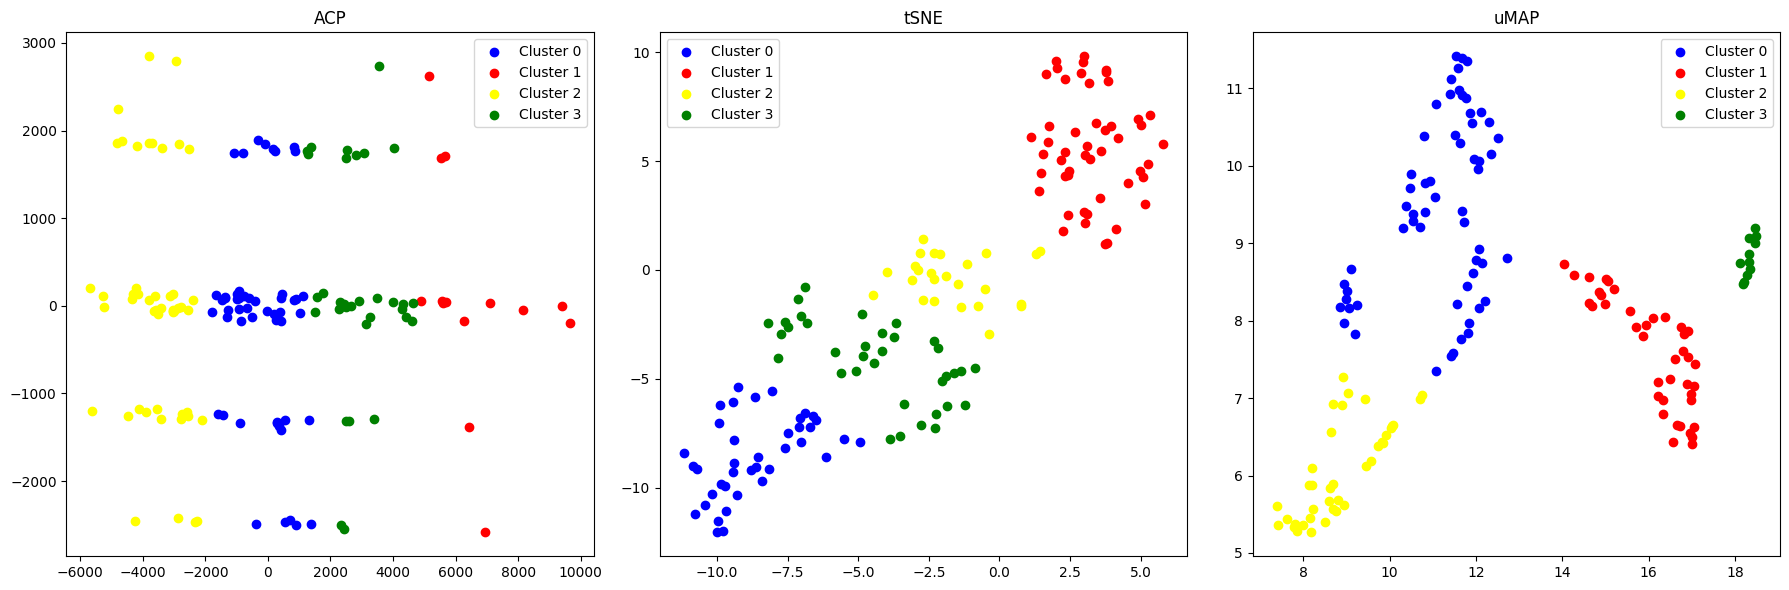

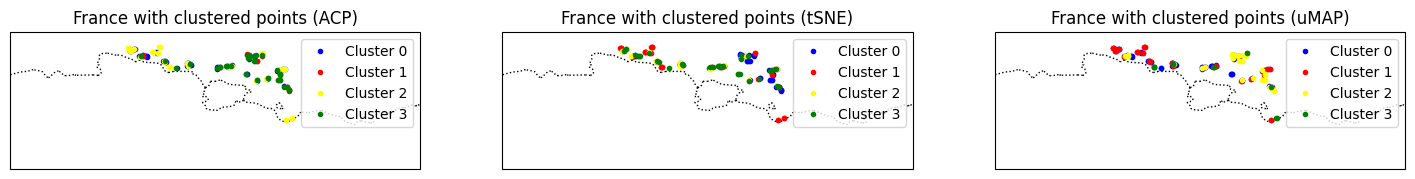

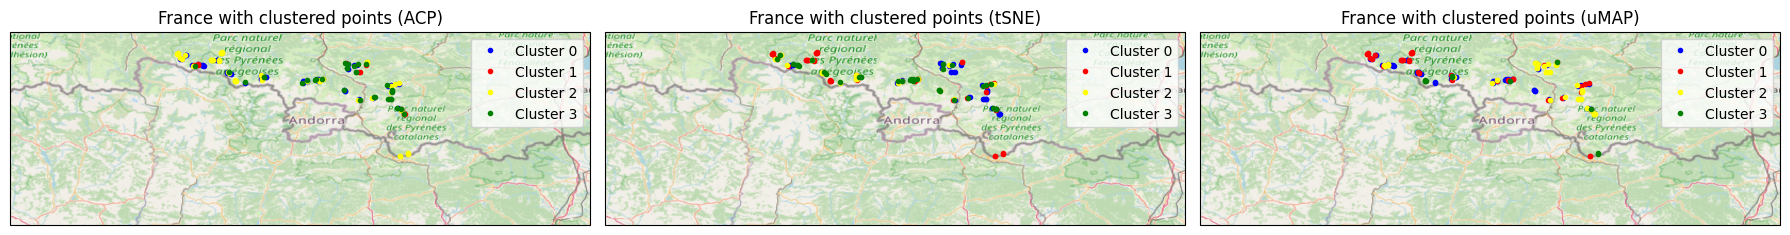

In [ ]:
# Création de la figure et des sous-graphiques
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Tracé ACP
axs[0].set_title('ACP')
for cluster_label, color in cluster_colors.items():
    df_cluster = df[df['Cluster_ACP'] == cluster_label]
    axs[0].scatter(pca_result[df_cluster.index, 0], pca_result[df_cluster.index, 1], c=color, label=f'Cluster {cluster_label}')
axs[0].legend()

# Tracé t-SNE
axs[1].set_title('tSNE')
for cluster_label, color in cluster_colors_tsne.items():
    df_cluster_tsne = df[df['Cluster_tSNE'] == cluster_label]
    axs[1].scatter(tsne_result[df_cluster_tsne.index, 0], tsne_result[df_cluster_tsne.index, 1], c=color, label=f'Cluster {cluster_label}')
axs[1].legend()

# Tracé uMAP
axs[2].set_title('uMAP')
for cluster_label, color in cluster_colors_umap.items():
    df_cluster_umap = df[df['Cluster_uMAP'] == cluster_label]
    axs[2].scatter(umap_result[df_cluster_umap.index, 0], umap_result[df_cluster_umap.index, 1], c=color, label=f'Cluster {cluster_label}')
axs[2].legend()

plt.tight_layout()
plt.show()

# Définir les couleurs pour chaque cluster
cluster_colors_acp = {0: 'blue', 1: 'red', 2: 'orange', 3: 'green'}
cluster_colors_tsne = {0: 'blue', 1: 'red', 2: 'orange', 3: 'green'}
cluster_colors_umap = {0: 'blue', 1: 'red', 2: 'orange', 3: 'green'}

# Créer une nouvelle figure et les sous-tracés
fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Tracer la carte de la France pour chaque représentation
for ax, cluster_colors, representation in zip(axs, [cluster_colors_acp, cluster_colors_tsne, cluster_colors_umap], ['ACP', 'tSNE', 'uMAP']):
    ax.set_extent([lon_min, lon_max, lat_min, lat_max])
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Tracer les points en fonction de leur cluster
    for cluster_label, color in cluster_colors.items():
        df_cluster = df[df[f'Cluster_{representation}'] == cluster_label]
        ax.plot(df_cluster['LON'], df_cluster['LAT'], '.', color=color, label=f'Cluster {cluster_label}', transform=ccrs.PlateCarree())

    ax.set_title(f'France with clustered points ({representation})')
    ax.legend()


# Créer une nouvelle figure et les sous-tracés
fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Tracer la carte de la France pour chaque représentation
for ax, cluster_colors, representation in zip(axs, [cluster_colors_acp, cluster_colors_tsne, cluster_colors_umap], ['ACP', 'tSNE', 'uMAP']):
    ax.set_extent([lon_min, lon_max, lat_min, lat_max])

    imagery = OSM()
    ax.add_image(imagery, 8)

    # Tracer les points en fonction de leur cluster
    for cluster_label, color in cluster_colors.items():
        df_cluster = df[df[f'Cluster_{representation}'] == cluster_label]
        ax.plot(df_cluster['LON'], df_cluster['LAT'], '.', color=color, label=f'Cluster {cluster_label}', transform=ccrs.PlateCarree())

    ax.set_title(f'France with clustered points ({representation})')
    ax.legend()


plt.tight_layout()
plt.show()



---

# Clustering hierarchique

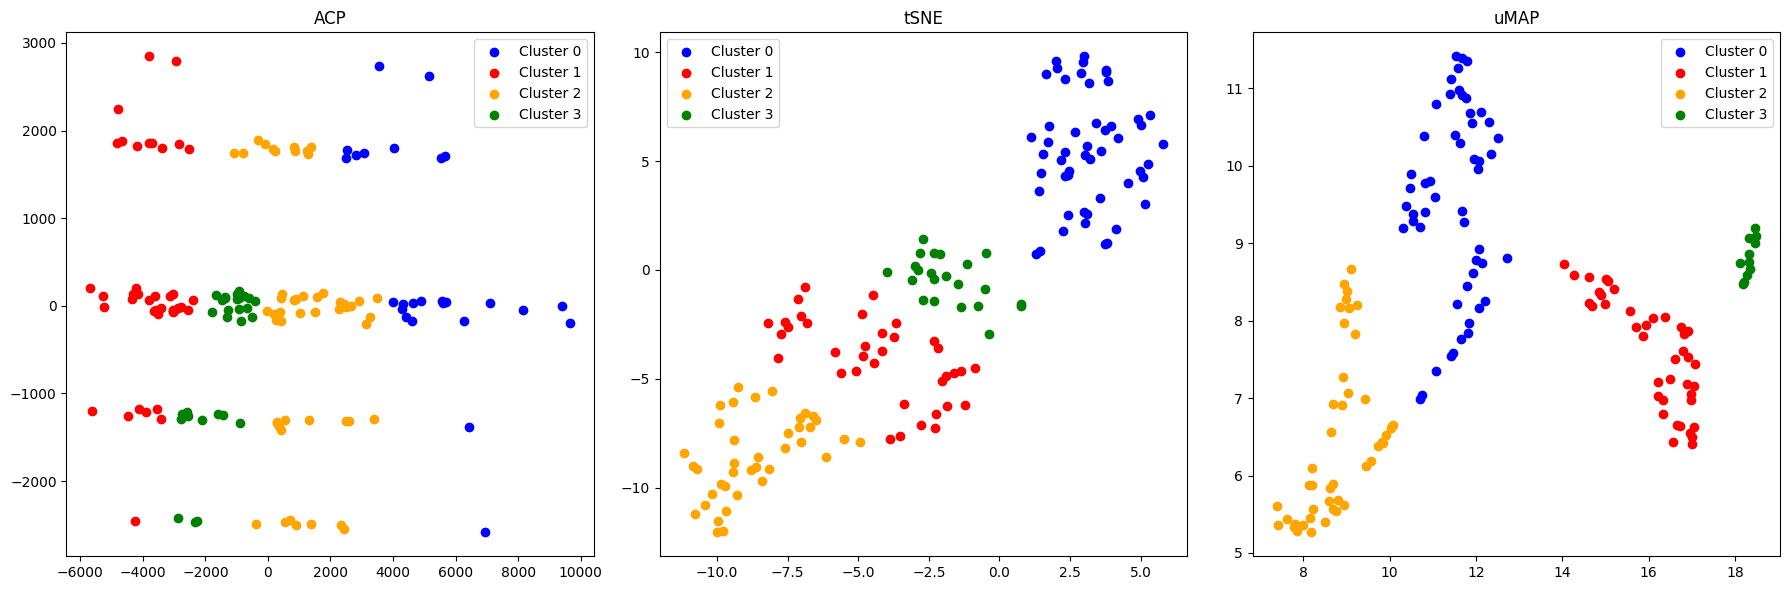

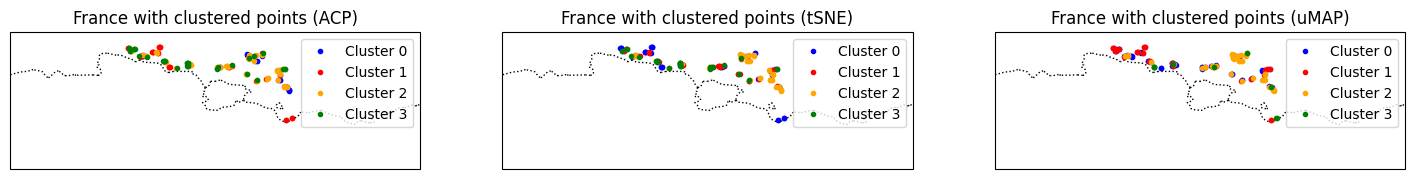

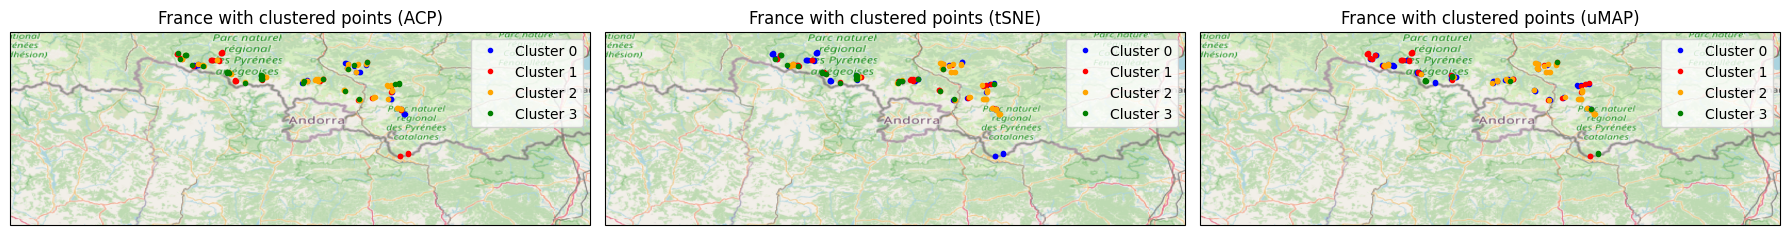

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Effectuer le clustering hiérarchique sur les données ACP
agg_clustering_acp = AgglomerativeClustering(n_clusters=4)
cluster_labels_acp = agg_clustering_acp.fit_predict(pca_result)

# Ajouter la colonne Cluster_CH_ACP au DataFrame
df['Cluster_CH_ACP'] = cluster_labels_acp

# Effectuer le clustering hiérarchique sur les données t-SNE
agg_clustering_tsne = AgglomerativeClustering(n_clusters=4)
cluster_labels_tsne = agg_clustering_tsne.fit_predict(tsne_result)

# Ajouter la colonne Cluster_CH_tSNE au DataFrame
df['Cluster_CH_tSNE'] = cluster_labels_tsne

# Effectuer le clustering hiérarchique sur les données UMAP
agg_clustering_umap = AgglomerativeClustering(n_clusters=4)
cluster_labels_umap = agg_clustering_umap.fit_predict(umap_result)

# Ajouter la colonne Cluster_CH_uMAP au DataFrame
df['Cluster_CH_uMAP'] = cluster_labels_umap

# Création de la figure et des sous-graphiques
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Tracé ACP
axs[0].set_title('ACP')
for cluster_label, color in cluster_colors_acp.items():
    df_cluster = df[df['Cluster_CH_ACP'] == cluster_label]
    axs[0].scatter(pca_result[df_cluster.index, 0], pca_result[df_cluster.index, 1], c=color, label=f'Cluster {cluster_label}')
axs[0].legend()

# Tracé t-SNE
axs[1].set_title('tSNE')
for cluster_label, color in cluster_colors_tsne.items():
    df_cluster_tsne = df[df['Cluster_CH_tSNE'] == cluster_label]
    axs[1].scatter(tsne_result[df_cluster_tsne.index, 0], tsne_result[df_cluster_tsne.index, 1], c=color, label=f'Cluster {cluster_label}')
axs[1].legend()

# Tracé uMAP
axs[2].set_title('uMAP')
for cluster_label, color in cluster_colors_umap.items():
    df_cluster_umap = df[df['Cluster_CH_uMAP'] == cluster_label]
    axs[2].scatter(umap_result[df_cluster_umap.index, 0], umap_result[df_cluster_umap.index, 1], c=color, label=f'Cluster {cluster_label}')
axs[2].legend()

plt.tight_layout()
plt.show()



# Définir les couleurs pour chaque cluster
cluster_colors_acp = {0: 'blue', 1: 'red', 2: 'orange', 3: 'green'}
cluster_colors_tsne = {0: 'blue', 1: 'red', 2: 'orange', 3: 'green'}
cluster_colors_umap = {0: 'blue', 1: 'red', 2: 'orange', 3: 'green'}

# Créer une nouvelle figure et les sous-tracés
fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Tracer la carte de la France pour chaque représentation
for ax, cluster_colors, representation in zip(axs, [cluster_colors_acp, cluster_colors_tsne, cluster_colors_umap], ['ACP', 'tSNE', 'uMAP']):
    ax.set_extent([lon_min, lon_max, lat_min, lat_max])
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Tracer les points en fonction de leur cluster
    for cluster_label, color in cluster_colors.items():
        df_cluster = df[df[f'Cluster_CH_{representation}'] == cluster_label]
        ax.plot(df_cluster['LON'], df_cluster['LAT'], '.', color=color, label=f'Cluster {cluster_label}', transform=ccrs.PlateCarree())

    ax.set_title(f'France with clustered points ({representation})')
    ax.legend()


# Créer une nouvelle figure et les sous-tracés
fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Tracer la carte de la France pour chaque représentation
for ax, cluster_colors, representation in zip(axs, [cluster_colors_acp, cluster_colors_tsne, cluster_colors_umap], ['ACP', 'tSNE', 'uMAP']):
    ax.set_extent([lon_min, lon_max, lat_min, lat_max])

    imagery = OSM()
    ax.add_image(imagery, 8)

    # Tracer les points en fonction de leur cluster
    for cluster_label, color in cluster_colors.items():
        df_cluster = df[df[f'Cluster_CH_{representation}'] == cluster_label]
        ax.plot(df_cluster['LON'], df_cluster['LAT'], '.', color=color, label=f'Cluster {cluster_label}', transform=ccrs.PlateCarree())

    ax.set_title(f'France with clustered points ({representation})')
    ax.legend()


plt.tight_layout()
plt.show()


----

# Spectral Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


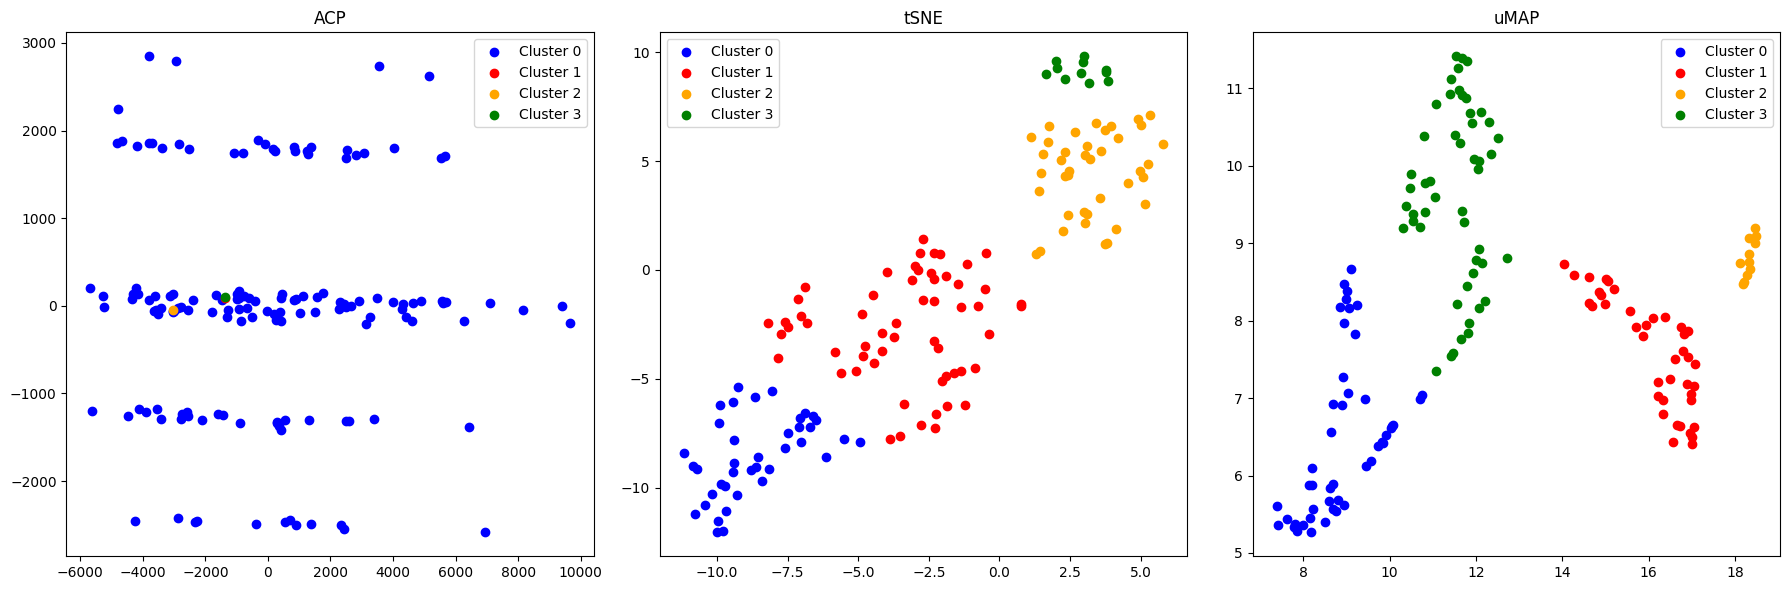

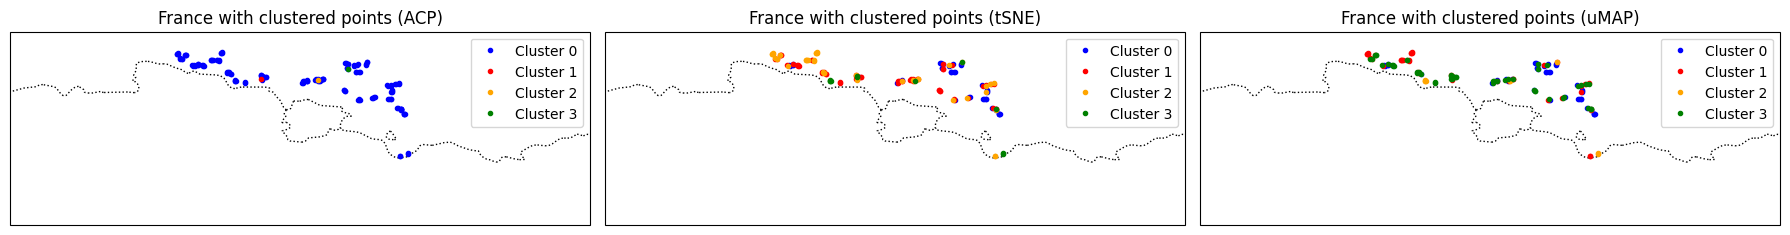

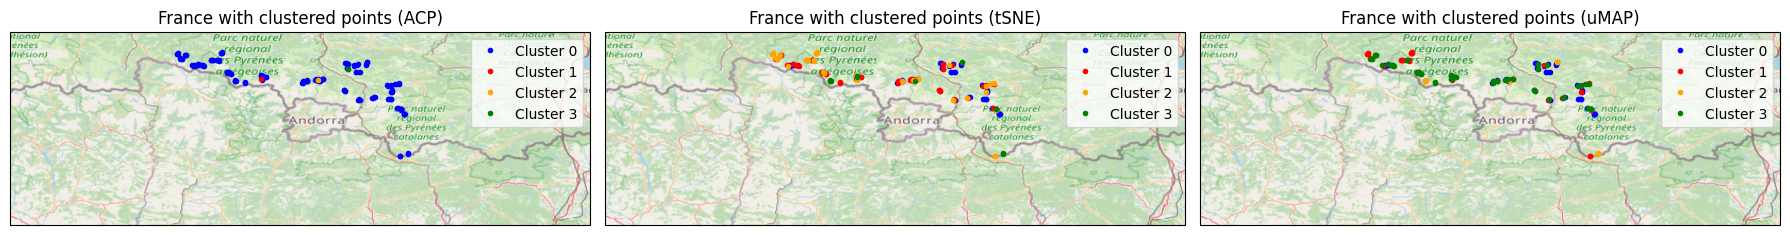

In [ ]:
from sklearn.cluster import SpectralClustering

# Effectuer le clustering spectral sur les données ACP
spectral_clustering_acp = SpectralClustering(n_clusters=4, random_state=42)
cluster_labels_acp = spectral_clustering_acp.fit_predict(pca_result)

# Ajouter la colonne Cluster_SC_ACP au DataFrame
df['Cluster_SC_ACP'] = cluster_labels_acp

# Effectuer le clustering spectral sur les données t-SNE
spectral_clustering_tsne = SpectralClustering(n_clusters=4, random_state=42)
cluster_labels_tsne = spectral_clustering_tsne.fit_predict(tsne_result)

# Ajouter la colonne Cluster_SC_tSNE au DataFrame
df['Cluster_SC_tSNE'] = cluster_labels_tsne

# Effectuer le clustering spectral sur les données UMAP
spectral_clustering_umap = SpectralClustering(n_clusters=4, random_state=42)
cluster_labels_umap = spectral_clustering_umap.fit_predict(umap_result)

# Ajouter la colonne Cluster_SC_uMAP au DataFrame
df['Cluster_SC_uMAP'] = cluster_labels_umap

# Affichage des cinq premières lignes pour vérification
# print(df.T)

# Création de la figure et des sous-graphiques
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Tracé ACP
axs[0].set_title('ACP')
for cluster_label, color in cluster_colors_acp.items():
    df_cluster = df[df['Cluster_SC_ACP'] == cluster_label]
    axs[0].scatter(pca_result[df_cluster.index, 0], pca_result[df_cluster.index, 1], c=color, label=f'Cluster {cluster_label}')
axs[0].legend()

# Tracé t-SNE
axs[1].set_title('tSNE')
for cluster_label, color in cluster_colors_tsne.items():
    df_cluster_tsne = df[df['Cluster_SC_tSNE'] == cluster_label]
    axs[1].scatter(tsne_result[df_cluster_tsne.index, 0], tsne_result[df_cluster_tsne.index, 1], c=color, label=f'Cluster {cluster_label}')
axs[1].legend()

# Tracé uMAP
axs[2].set_title('uMAP')
for cluster_label, color in cluster_colors_umap.items():
    df_cluster_umap = df[df['Cluster_SC_uMAP'] == cluster_label]
    axs[2].scatter(umap_result[df_cluster_umap.index, 0], umap_result[df_cluster_umap.index, 1], c=color, label=f'Cluster {cluster_label}')
axs[2].legend()

plt.tight_layout()
plt.show()

# Définir les couleurs pour chaque cluster
cluster_colors_acp = {0: 'blue', 1: 'red', 2: 'orange', 3: 'green'}
cluster_colors_tsne = {0: 'blue', 1: 'red', 2: 'orange', 3: 'green'}
cluster_colors_umap = {0: 'blue', 1: 'red', 2: 'orange', 3: 'green'}

# Créer une nouvelle figure et les sous-tracés
fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Tracer la carte de la France pour chaque représentation
for ax, cluster_colors, representation in zip(axs, [cluster_colors_acp, cluster_colors_tsne, cluster_colors_umap], ['ACP', 'tSNE', 'uMAP']):
    ax.set_extent([lon_min, lon_max, lat_min, lat_max])
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Tracer les points en fonction de leur cluster
    for cluster_label, color in cluster_colors.items():
        df_cluster = df[df[f'Cluster_SC_{representation}'] == cluster_label]
        ax.plot(df_cluster['LON'], df_cluster['LAT'], '.', color=color, label=f'Cluster {cluster_label}', transform=ccrs.PlateCarree())

    ax.set_title(f'France with clustered points ({representation})')
    ax.legend()

plt.tight_layout()
plt.show()

# Créer une nouvelle figure et les sous-tracés
fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Tracer la carte de la France pour chaque représentation
for ax, cluster_colors, representation in zip(axs, [cluster_colors_acp, cluster_colors_tsne, cluster_colors_umap], ['ACP', 'tSNE', 'uMAP']):
    ax.set_extent([lon_min, lon_max, lat_min, lat_max])

    imagery = OSM()
    ax.add_image(imagery, 8)

    # Tracer les points en fonction de leur cluster
    for cluster_label, color in cluster_colors.items():
        df_cluster = df[df[f'Cluster_SC_{representation}'] == cluster_label]
        ax.plot(df_cluster['LON'], df_cluster['LAT'], '.', color=color, label=f'Cluster {cluster_label}', transform=ccrs.PlateCarree())

    ax.set_title(f'France with clustered points ({representation})')
    ax.legend()

plt.tight_layout()
plt.show()
